# Quantum Entanglement (Kuantum Dolanıklık)

## Giriş
Kuantum dolanıklık (**quantum entanglement**), kuantum mekaniğinin en temel ve aynı zamanda en sıra dışı fenomenlerinden biridir.  
Bu olgu, iki veya daha fazla kuantum sisteminin (örneğin qubitlerin) kuantum durumlarının birbirinden bağımsız tanımlanamayacağı, yalnızca ortak bir durumla ifade edilebileceği özel bir korelasyon biçimidir.  

Klasik korelasyon ile arasındaki temel fark, dolanık sistemlerde ölçüm sonuçlarının **önceden belirlenmemiş** olmasıdır. Ölçüm işlemi gerçekleştiğinde, sonuçlar anında birbirini tamamlayacak biçimde ortaya çıkar.  

**Örnek Bell Durumu (EPR Çifti):**

$$
|\Phi^+\rangle = \frac{|00⟩ + |11⟩}{\sqrt{2}}
$$

Bu durum, iki qubitin dolanıklık halinde olmasının en basit ve en çok çalışılan örneğidir.

---

## Matematiksel Arka Plan
Bir kuantum bit (qubit), iki boyutlu Hilbert uzayında tanımlanır:  

$$
|ψ⟩ = \alpha|0⟩ + \beta|1⟩, \quad \text{burada } |\alpha|^2 + |\beta|^2 = 1
$$

İki qubitlik sistemler **tensor çarpımı** ile elde edilir. Dolanıklık, bu sistemlerde ortaya çıkan ve ayrı ayrı qubit durumlarına indirgenemeyen süperpozisyonlarla tanımlanır.  

Örneğin, aşağıdaki durum **dolanık**tır:  

$$
|\Psi⟩ = \frac{|01⟩ + |10⟩}{\sqrt{2}}
$$

Çünkü bu durum, tek tek qubitlerin ürün durumları şeklinde yazılamaz.

---

## Qiskit ile Deneysel Simülasyon

Aşağıdaki örnekte, **Hadamard** ve **CNOT** kapıları kullanılarak bir Bell durumu hazırlanmakta ve ölçüm sonuçları simüle edilmektedir.

In [1]:
# Qiskit’in temel bileşenlerini içe aktar
from qiskit import *

In [2]:
# AerSimulator: Qiskit Aer modülünün sağladığı kuantum devre simülatörü
# Gerçek cihaz olmadan devreleri bilgisayarda çalıştırmak için kullanılır.
from qiskit_aer import AerSimulator

In [3]:
# Ölçüm sonuçlarını histogram olarak görselleştirmek için
from qiskit.visualization import plot_histogram  

In [4]:
# 2 qubit ve 2 klasik bitlik qubit devresi oluşturma
Circuit = QuantumCircuit(2, 2)

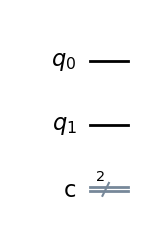

In [5]:
# Görselleştirme
Circuit.draw('mpl')

### Hadamard ve CNOT Kapılarının Rolü

- **Hadamard (H) kapısı**: Bir qubit’i süperpozisyona sokar.  
  Örneğin $|0⟩$ durumu Hadamard’dan geçerse:  

  $$
  H|0⟩ = \frac{|0⟩ + |1⟩}{\sqrt{2}}
  $$

  Yani qubit aynı anda hem $|0⟩$ hem $|1⟩$ durumunda bulunur.

- **CNOT kapısı**: Bir kontrol ve bir hedef qubit arasında etkileşim kurar.  
  Kontrol qubit $|1⟩$ durumunda olduğunda hedef qubit’in durumu terslenir.  

Hadamard + CNOT kombinasyonu, iki qubit arasında **dolanıklık** üretmenin en temel yöntemidir.  


In [6]:
# Dolanıklık üretimi: Hadamard + CNOT
Circuit.h(0)
Circuit.cx(0,1)

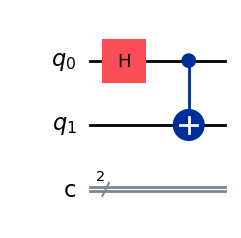

In [7]:
# Görselleştirme
Circuit.draw('mpl')

### Ölçüm Aşaması

Bu adımda, kuantum devresindeki qubitlerin durumlarını **klasik bitlere** aktarıyoruz.  
- İlk parametre `[0,1]`, **ölçüm yapılacak qubitleri** gösterir. Burada `0` ve `1`, devrede tanımlı olan iki qubit numarasını ifade eder.  
- İkinci parametre `[0,1]`, **sonuçların yazılacağı klasik bitleri** belirtir.  

Dolayısıyla `Circuit.measure([0,1], [0,1])` ifadesi:  

- Qubit **0** → Klasik bit **0**  
- Qubit **1** → Klasik bit **1**  

şeklinde eşleme yaparak ölçüm sonuçlarını klasik bilgisayarda okunabilir hale getirir.


In [8]:
# Ölçüm
Circuit.measure([0,1],[0,1])

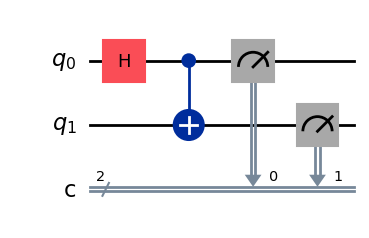

In [9]:
# Görselleştirme
Circuit.draw('mpl')

In [10]:
# Simülatör
simulator = AerSimulator()

In [11]:
# Devreyi derle
compiled_circuit = transpile(Circuit, simulator)

In [12]:
# Devreyi simülatörde çalıştırma (1000 shot)
sim_result = simulator.run(compiled_circuit, shots=1000).result()

In [13]:
# Ölçüm sonuçları
counts = sim_result.get_counts()

# Ölçüm Sonuçlarının Histogramı

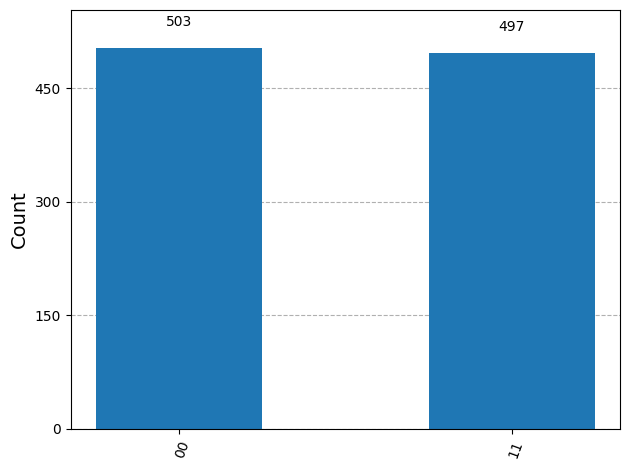

In [14]:
# Ölçüm sonuçlarının histogramı
plot_histogram(counts)

## Ölçüm Sonuçlarının Yorumu

Simülasyonun çıktısı tipik olarak iki temel durum etrafında yoğunlaşır:

- Yaklaşık %50 olasılıkla $|00⟩$  
- Yaklaşık %50 olasılıkla $|11⟩$  

Bu sonuçlar, dolanıklığın özünü yansıtır: birinci qubitin ölçüm sonucu **0** olduğunda, ikinci qubit de kesinlikle **0** olur; aynı şekilde birinci qubit **1** ise, diğeri de kesinlikle **1** olarak ölçülür.  

Bu korelasyon, klasik sistemlerde açıklanamayacak ölçüde güçlüdür.  

---

##  Bell Testi ve Kuantum Korelasyonlar

Dolanıklığın deneysel olarak doğrulanması, **Bell eşitsizlikleri** ile mümkündür. Bu testler, kuantum korelasyonların klasik gizli değişken teorileriyle açıklanamayacağını göstermektedir.  

Örneğin, **CHSH eşitsizliği** kuantum mekaniğinde ihlal edilmektedir ve bu da kuantum dolanıklığın klasik korelasyonlardan ayrıştığını kanıtlamaktadır.  

---

## Sonuç

Kuantum dolanıklık, kuantum bilgi kuramı ve kuantum teknolojilerinin merkezinde yer almaktadır.  
Başlıca uygulama alanları şunlardır:

- **Kuantum kriptografi (QKD)**: Güvenli anahtar dağıtımı  
- **Kuantum teleportasyon**: Kuantum durumlarının uzak mesafelere aktarılması  
- **Kuantum ağları**: Dolanıklığa dayalı bilgi paylaşımı  

Sonuç olarak, kuantum dolanıklık yalnızca temel kuantum mekaniğinin bir öngörüsü değil, aynı zamanda kuantum bilgi işleminin ve kuantum iletişimin pratik uygulanabilirliğinin anahtarıdır.
